# 서포트 벡터 머신

## 데이터 불러오기

In [1]:
# 연산 처리를 위한 패키지
import numpy as np
import pandas as pd

# 데이터 분석을 위한 패키지
from sklearn import svm
from sklearn.model_selection import GridSearchCV 

# 시각화를 위한 패키지
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_decision_regions

# 그래프를 실제로 그리기 위한 설정
%matplotlib inline

# 경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_svm = pd.read_csv('C:/Users/Administrator/GitHub/TIL/ADP_study/rawdata/df_titanic.csv')

# 데이터 확인
df_svm

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_1
0,0,22.0,1,0,1.981001,0,1,1
1,1,38.0,1,0,4.266662,0,0,0
2,1,26.0,0,0,2.070022,0,1,0
3,1,35.0,1,0,3.972177,0,0,0
4,0,35.0,0,0,2.085672,0,1,1
...,...,...,...,...,...,...,...,...
1038,1,3.0,1,1,2.622855,0,1,0
1039,1,37.0,1,0,4.499810,0,0,0
1040,1,28.0,0,0,2.050913,0,1,0
1041,1,39.0,0,0,4.690430,0,0,0


## 선형 커널 - LinearSVC
### X(Fare, Age) / y(Survived)

In [3]:
X = np.array(df_svm[['Fare','Age']])
y = np.array(df_svm['Survived'])

# C: Cost(비용), 마진 너비 조절 변수 값이 클수록 마진 너비가 좁아진다
clf = svm.SVC(kernel='linear', C=0.01)
clf.fit(X,y)

SVC(C=0.01, kernel='linear')

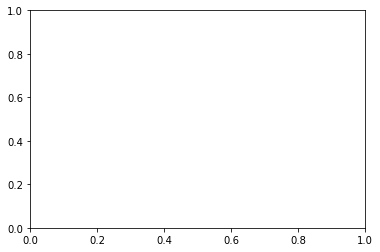

In [4]:
# 결정 함수 플로팅
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


# 모델 평가를위한 그리드 생성
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

In [5]:
xy

array([[0.        , 0.        ],
       [0.        , 0.03448276],
       [0.        , 0.06896552],
       ...,
       [1.        , 0.93103448],
       [1.        , 0.96551724],
       [1.        , 1.        ]])

In [6]:
clf.decision_function(xy)

array([-1.89335589, -1.89390107, -1.89444626, -1.89499145, -1.89553664,
       -1.89608182, -1.89662701, -1.8971722 , -1.89771739, -1.89826257,
       -1.89880776, -1.89935295, -1.89989814, -1.90044332, -1.90098851,
       -1.9015337 , -1.90207889, -1.90262407, -1.90316926, -1.90371445,
       -1.90425964, -1.90480482, -1.90535001, -1.9058952 , -1.90644039,
       -1.90698557, -1.90753076, -1.90807595, -1.90862114, -1.90916632,
       -1.87284354, -1.87338873, -1.87393392, -1.8744791 , -1.87502429,
       -1.87556948, -1.87611467, -1.87665985, -1.87720504, -1.87775023,
       -1.87829542, -1.8788406 , -1.87938579, -1.87993098, -1.88047617,
       -1.88102135, -1.88156654, -1.88211173, -1.88265692, -1.8832021 ,
       -1.88374729, -1.88429248, -1.88483767, -1.88538285, -1.88592804,
       -1.88647323, -1.88701842, -1.8875636 , -1.88810879, -1.88865398,
       -1.85233119, -1.85287638, -1.85342157, -1.85396676, -1.85451194,
       -1.85505713, -1.85560232, -1.85614751, -1.85669269, -1.85

In [7]:
print(c)

NameError: name 'c' is not defined

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

In [ ]:
# 서포트 벡터 플로팅
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50,
           linewidth=1, facecolors='none', edgecolors='k')

In [ ]:
# X축, y축 라벨링
plt.xlabel("Fare")
plt.ylabel("Age")

plot_decision_regions(X=X, 
                      y=y,
                      clf=clf, 
                      legend=2)

plt.title('SVM Decision Region Boundary - Linear', size=14)
L = plt.legend()
L.get_texts()[0].set_text('Survived=0')
L.get_texts()[1].set_text('Survived=1')



# 결정 함수 플로팅
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


# 모델 평가를위한 그리드 생성
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)


# 결정 경계와 마진
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])


plt.show()

In [ ]:
clf.decision_function(xy)

In [ ]:
# 결정 함수 플로팅
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


# 모델 평가를위한 그리드 생성
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)


# 결정 경계와 마진
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

In [ ]:
clf.score(X, y)

### GridSearchCV 를 활용한 최적의 파라미터 찾기

In [ ]:
GridSearchCV?

# estimator: regressor, classifier  등이 사용 됩니다.
# param_grid: 딕셔너리 형태 이며 파라미터 튜닝을 위한 여러 파라미터 명과 값을 지정
# n_jobs: CPU 코어 사용 갯수, -1 지정시 모든 코어 사용
# refit: 최적의 하이퍼 파라미터를 찾은 뒤 그 파라미터를 입력된 estimator로 재학습
# cv: cross validation, 교차 검증을 위해 분할 되는 세트의 개수

In [ ]:
# defining parameter range 
# C: Cost(비용), 마진 너비 조절 변수 값이 클수록 마진 너비가 좁아진다
# gamma: 감마, 작을 데이터 포인트의 영향이 커 경계가 완만해진다.
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, scoring = 'accuracy', n_jobs=-1) 
grid.fit(X, y)

In [ ]:
df_grid = pd.DataFrame(grid.cv_results_)
df_grid.head()

In [ ]:
df_grid[['params','mean_test_score','rank_test_score']].sort_values(['rank_test_score']).head()

In [ ]:
print ("최고 Score: ",str(grid.best_score_))
print ("최적의 Parameters: ",str(grid.best_params_))
print ("최적의 Estimators: ",str(grid.best_estimator_))

In [ ]:
# 최적의 Parameter로 학습된 estomator
clf = grid.best_estimator_

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# 결정 함수 플로팅
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 모델 평가를위한 그리드 생성
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# 결정 경계와 마진
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# 서포트 벡터 플로팅
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50,
           linewidth=1, facecolors='none', edgecolors='k')

# X축, y축 라벨링
plt.xlabel("Fare")
plt.ylabel("Age")

plot_decision_regions(X=X, 
                      y=y,
                      clf=clf, 
                      legend=2)

plt.title('SVM Decision Region Boundary - Linear(GridSearchCV)', size=14)
L = plt.legend()
L.get_texts()[0].set_text('Survived=0')
L.get_texts()[1].set_text('Survived=1')

plt.show()

## 방사 기저 함수

In [ ]:
clf = svm.SVC(kernel="rbf", gamma=0.1, C=10)
clf.fit(X,y)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# 결정 함수 플로팅
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 모델 평가를위한 그리드 생성
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# 결정 경계와 마진
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# 서포트 벡터 플로팅
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50,
           linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel("Fare")
plt.ylabel("Age")

# X축, y축 라벨링
plot_decision_regions(X=X, 
                      y=y,
                      clf=clf, 
                      legend=2)

plt.title('SVM Decision Region Boundary - RBF', size=14)
L = plt.legend()
L.get_texts()[0].set_text('Survived=0')
L.get_texts()[1].set_text('Survived=1')


plt.show()

## 다항식 커널

In [ ]:
# degree: 몇 차원까지 할건지 지정
clf = svm.SVC(kernel='poly', degree=3, C=0.1, gamma='auto')
clf.fit(X,y)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# 결정 함수 플로팅
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 모델 평가를위한 그리드 생성
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# 결정 경계와 마진
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# 서포트 벡터 플로팅
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50,
           linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel("Fare")
plt.ylabel("Age")

# X축, y축 라벨링
plot_decision_regions(X=X, 
                      y=y,
                      clf=clf, 
                      legend=2)

plt.title('SVM Decision Region Boundary - Polynomial', size=14)
L = plt.legend()
L.get_texts()[0].set_text('Survived=0')
L.get_texts()[1].set_text('Survived=1')


plt.show()